In [1]:
import pandas as pd
import glob

files = [i for i in glob.glob(r'/workspaces/miniconda/PKdata/data/*.csv') if 'nca' not in i]

In [2]:

for f_idx, f in enumerate(files):
    if f_idx == 0:
        df_out = pd.read_csv(f)
        df_out = df_out[[i for i in df_out.columns if 'unnamed' not in i.lower()]]
        df_out['TIME'] = df_out['TIME'].astype(float)
    else:
        tmp = pd.read_csv(f)
        tmp = tmp[[i for i in tmp.columns if 'unnamed' not in i.lower()]]
        if 'TIME' in tmp.columns:
            tmp['TIME'] = df_out['TIME'].astype(float)
            merge_c = ['ID', 'TIME']
        else:
            merge_c = ['ID']
        df_out = df_out.merge(tmp, how = 'left', on = merge_c)
        

In [3]:
import numpy as np
from nca import estimate_subject_slope_cv, estimate_k_halflife
xth_df = df_out.loc[df_out['ANALYTE'] == 'xanthohumol', :].copy()


In [4]:
xth_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex
0,L1,0.00,0,xanthohumol,20.0,oral,M
1,L1,0.25,0,xanthohumol,NaN,NaN,M
2,L1,0.50,0,xanthohumol,NaN,NaN,M
3,L1,1.00,34,xanthohumol,NaN,NaN,M
4,L1,1.50,15,xanthohumol,NaN,NaN,M
...,...,...,...,...,...,...,...
1101,H17,24.00,6,xanthohumol,NaN,NaN,M
1102,H17,48.00,0,xanthohumol,NaN,NaN,M
1103,H17,72.00,0,xanthohumol,NaN,NaN,M
1104,H17,96.00,0,xanthohumol,NaN,NaN,M


In [5]:
tmp_df = pd.DataFrame({
    'ID':np.repeat('P1', 10), 
    'TIME':[0,1,2,3,4,6,9,12,18,24],
    'CONC':[8,7.09, 6.29, 5.58, 4.95, 3.89, 2.71, 1.89, 0.92, 0.44]
})
tmp_df2 = pd.DataFrame({
    'ID':np.repeat('P2', 10), 
    'TIME':[0,1,2,3,4,6,9,12,18,24],
    'CONC':[0, 12.18, 14.12, 13.43, 12.16, 9.64, 6.73, 4.69, 2.28, 1.11]
})
tmp_df = pd.concat([tmp_df, tmp_df2])

tmp_df['CONC_ln'] = np.log(tmp_df['CONC'])

/opt/conda/envs/pySunODE/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
tmp_df

,ID,TIME,CONC,CONC_ln
0,P1,0,8.00,2.079442
1,P1,1,7.09,1.958685
2,P1,2,6.29,1.838961
3,P1,3,5.58,1.719189
4,P1,4,4.95,1.599388
5,P1,6,3.89,1.358409
6,P1,9,2.71,0.996949
7,P1,12,1.89,0.636577
8,P1,18,0.92,-0.083382
9,P1,24,0.44,-0.820981


<Axes: xlabel='TIME', ylabel='CONC'>

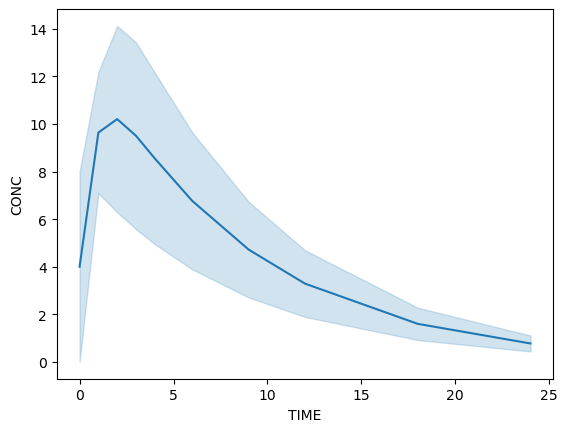

In [7]:
import seaborn as sns
sns.lineplot(tmp_df, x = 'TIME', y = 'CONC')


In [8]:
k_est = (np.log(.92) - np.log(.44)) / (18-24)
k_est

-0.1229331571884632

In [9]:
use_toy_2 = False
if use_toy_2:
    xth_df = tmp_df.copy()

In [10]:
xth_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex
0,L1,0.00,0,xanthohumol,20.0,oral,M
1,L1,0.25,0,xanthohumol,NaN,NaN,M
2,L1,0.50,0,xanthohumol,NaN,NaN,M
3,L1,1.00,34,xanthohumol,NaN,NaN,M
4,L1,1.50,15,xanthohumol,NaN,NaN,M
...,...,...,...,...,...,...,...
1101,H17,24.00,6,xanthohumol,NaN,NaN,M
1102,H17,48.00,0,xanthohumol,NaN,NaN,M
1103,H17,72.00,0,xanthohumol,NaN,NaN,M
1104,H17,96.00,0,xanthohumol,NaN,NaN,M


# K and Halflife (t_1/2)

In [11]:
dfs = []
for sub in xth_df['ID'].unique():
    dfs.append(estimate_subject_slope_cv(xth_df.loc[xth_df['ID'] == sub, :], conc_col='CONC'))

/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)


/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mean(start_idx_slopes)
/workspaces/miniconda/PK-Analysis/nca.py:40: RuntimeWarning: invalid value encountered in scalar divide
  slope_cv = np.std(start_idx_slopes) / np.mea

In [12]:
look = dfs[0]

In [13]:
from nca import identify_low_conc_zones


zero_starts = identify_low_conc_zones(dfs)

In [14]:
ks = estimate_k_halflife(dfs)
# this still needs to be filtered to give one unique value of the geom mean per subject

In [15]:
ks = ks[['ID', 'geom_mean_k_est', 'geom_mean_halflife_est']].drop_duplicates().copy()

<Axes: xlabel='TIME', ylabel='CONC'>

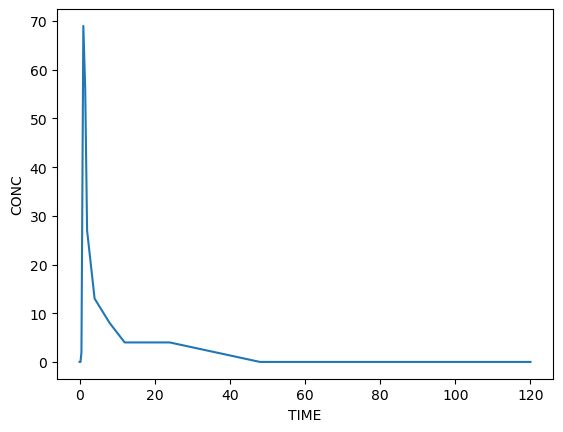

In [44]:
import seaborn as sns
from utils import safe_signed_log
from scipy.signal import savgol_filter

plot_me = xth_df.loc[(xth_df['ID'] == 'M10') & (xth_df['TIME'] < 200), :].copy()
plot_me['conc_ln'] = safe_signed_log(plot_me['CONC'])
sns.lineplot(plot_me, x = 'TIME', y = 'CONC',)


<Axes: xlabel='TIME', ylabel='CONC'>

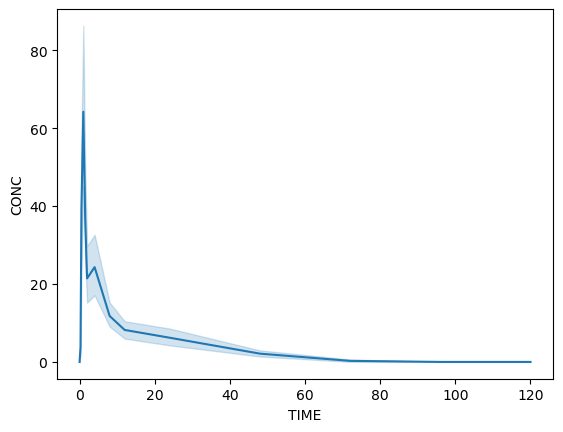

In [17]:
import seaborn as sns


sns.lineplot(xth_df, x = 'TIME', y = 'CONC',)

# MRT

In [18]:
from sklearn.metrics import auc

In [19]:
xth_df['ConcTime'] = xth_df['CONC'] * xth_df['TIME']

<Axes: xlabel='TIME', ylabel='ConcTime'>

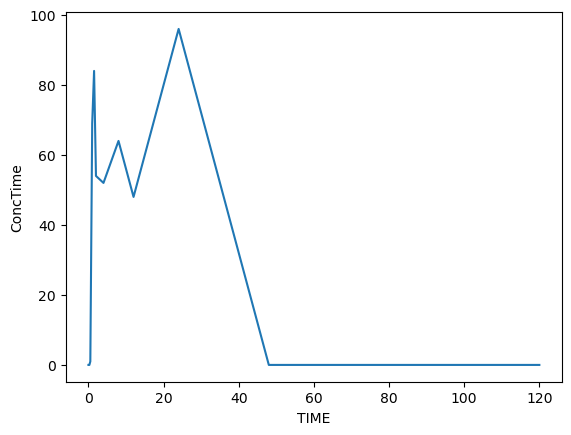

In [47]:
plot_me = xth_df.loc[(xth_df['ID'] == 'M10') & (xth_df['TIME'] < 200), :].copy()
sns.lineplot(plot_me, x = 'TIME', y = 'ConcTime',)

In [21]:
auc_df = (xth_df
 .groupby('ID')[['TIME', 'CONC']]
 .apply(lambda x: auc(x['TIME'], x['CONC']))
 .reset_index()
 .rename(columns = {0:'AUC'})
 )

auc_df.head()


,ID,AUC
0,H1,941.875
1,H10,820.875
2,H11,1038.500
3,H12,899.125
4,H13,425.000


In [22]:
def extend_auc_to_inf(time, conc, zero_start,terminal_k):
    final_conc = conc[time < zero_start][-1]
    return final_conc/terminal_k

def extend_aumc_to_inf(time, conc, zero_start,terminal_k):
    final_time = time[time < zero_start][-1]
    final_conc = conc[time < zero_start][-1]
    
    return (final_conc * final_time / terminal_k) + (final_conc / (final_time**2))
    

In [23]:
auc_calc_df = xth_df.merge(zero_starts, how = 'left', on = 'ID').merge(ks, how = 'left', on = 'ID').copy()

In [24]:
auc_calc_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime,zero_window_time_start,consecutive_zero_windows,geom_mean_k_est,geom_mean_halflife_est
0,L1,0.00,0,xanthohumol,20.0,oral,M,0.0,24.0,4,0.149313,4.641248
1,L1,0.25,0,xanthohumol,NaN,NaN,M,0.0,24.0,4,0.149313,4.641248
2,L1,0.50,0,xanthohumol,NaN,NaN,M,0.0,24.0,4,0.149313,4.641248
3,L1,1.00,34,xanthohumol,NaN,NaN,M,34.0,24.0,4,0.149313,4.641248
4,L1,1.50,15,xanthohumol,NaN,NaN,M,22.5,24.0,4,0.149313,4.641248
...,...,...,...,...,...,...,...,...,...,...,...,...
667,H17,24.00,6,xanthohumol,NaN,NaN,M,144.0,48.0,3,0.050860,13.625760
668,H17,48.00,0,xanthohumol,NaN,NaN,M,0.0,48.0,3,0.050860,13.625760
669,H17,72.00,0,xanthohumol,NaN,NaN,M,0.0,48.0,3,0.050860,13.625760
670,H17,96.00,0,xanthohumol,NaN,NaN,M,0.0,48.0,3,0.050860,13.625760


In [25]:
from nca import calculate_aucs
debugging_tmp = False
auc_df = []
aucmc_df = []
for sub in auc_calc_df['ID'].unique():
    if sub == 'M10':
        debugging_tmp = True
        #orig_settings = np.seterr(all='raise')
    work_df = auc_calc_df.loc[auc_calc_df['ID'] == sub, :].copy()
    zero_start = work_df['zero_window_time_start'].unique()[0]
    terminal_k = work_df['geom_mean_k_est'].unique()[0]
    aucs = calculate_aucs(work_df['TIME'].values, work_df['CONC'].values, zero_start, terminal_k)
    auc_inf = extend_auc_to_inf(work_df['TIME'].values, work_df['CONC'].values, zero_start, terminal_k)
    #if debugging_tmp:
        #np.seterr(**orig_settings) 
    aucs['ID'] = sub
    work_df['ConcTime'] = work_df['TIME'].values * work_df['CONC'].values
    aucmc = calculate_aucs(work_df['TIME'].values, work_df['ConcTime'].values, zero_start, terminal_k, aucmc=True)
    aumc_inf = extend_aumc_to_inf(work_df['TIME'].values, work_df['ConcTime'].values, zero_start, terminal_k)
    aucmc['ID'] = sub
    auc_df.append(aucs)
    aucmc_df.append(aucmc)
auc_df = pd.concat(auc_df).reset_index(drop = True)
aucmc_df = pd.concat(aucmc_df).reset_index(drop = True)
#auc_df = auc_df.merge(aucmc_df, how = 'left', on = 'ID')

In [26]:
xth_df.loc[xth_df['ID'] == 'H12', :]

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime
1022,H12,0.00,0,xanthohumol,180.0,oral,M,0.0
1023,H12,0.25,0,xanthohumol,NaN,NaN,M,0.0
1024,H12,0.50,11,xanthohumol,NaN,NaN,M,5.5
1025,H12,1.00,98,xanthohumol,NaN,NaN,M,98.0
1026,H12,1.50,56,xanthohumol,NaN,NaN,M,84.0
1027,H12,2.00,32,xanthohumol,NaN,NaN,M,64.0
1028,H12,4.00,28,xanthohumol,NaN,NaN,M,112.0
1029,H12,8.00,18,xanthohumol,NaN,NaN,M,144.0
1030,H12,12.00,35,xanthohumol,NaN,NaN,M,420.0
1031,H12,24.00,11,xanthohumol,NaN,NaN,M,264.0


In [27]:
auc_df.head()

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID
0,0.00,0.25,0,0.0,0.000000,0.00,False,75.73344,72.930379,75.486638,42.0,73.177182,L1
1,0.25,0.50,0,0.0,0.000000,0.00,False,75.73344,72.930379,75.486638,42.0,73.177182,L1
2,0.50,1.00,0,34.0,4.781529,8.50,True,75.73344,72.930379,75.486638,42.0,73.177182,L1
3,1.00,1.50,34,15.0,12.136553,12.25,False,75.73344,72.930379,75.486638,42.0,73.177182,L1
4,1.50,2.00,15,6.0,5.443470,5.25,False,75.73344,72.930379,75.486638,42.0,73.177182,L1


In [28]:
aucmc_df.head()

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID
0,0.00,0.25,0.0,0.0,0.000000,0.000,False,4983.651496,4920.405757,4985.74248,163.25,4918.314773,L1
1,0.25,0.50,0.0,0.0,0.000000,0.000,False,4983.651496,4920.405757,4985.74248,163.25,4918.314773,L1
2,0.50,1.00,0.0,34.0,4.781529,8.500,True,4983.651496,4920.405757,4985.74248,163.25,4918.314773,L1
3,1.00,1.50,34.0,22.5,14.434628,14.125,False,4983.651496,4920.405757,4985.74248,163.25,4918.314773,L1
4,1.50,2.00,22.5,12.0,8.867478,8.625,False,4983.651496,4920.405757,4985.74248,163.25,4918.314773,L1


In [29]:
auc_df['MRT'] = aucmc_df['linup_logdown'] / auc_df['linup_logdown']

In [30]:
nca_df = pd.read_csv(r'/workspaces/miniconda/PKdata/data/xanthohumol_nca.csv')
#mrt_df = nca_df.loc[nca_df['Parameter'] == 'AUC']
mrt_df = nca_df.loc[nca_df['ANALYTE'] == 'xanthohumol', :]

In [31]:
mrt_df = mrt_df.pivot_table(index = ['ID', 'Software'],columns = 'Parameter', values = 'Value').reset_index()

In [32]:
plot_me = mrt_df.merge(auc_df[['ID', 'linup_logdown', 'linear_auc']], how = 'left', on = 'ID')

In [33]:
plot_me.loc[plot_me['linup_logdown'] < 0, :]

,ID,Software,AUC,AUMC,CL.F,Cmax,MRT,Tmax,Vss,Vz.F,lambda.z,thalf,linup_logdown,linear_auc


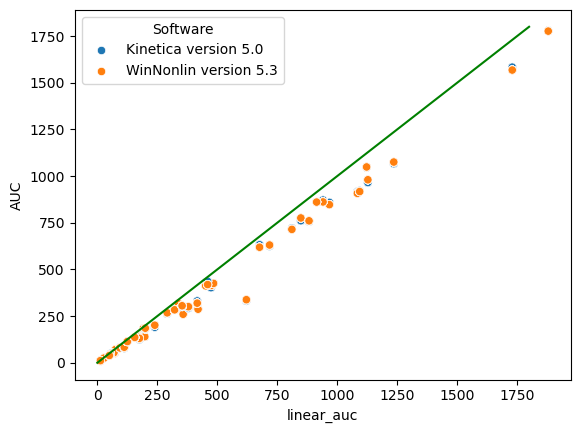

In [34]:
import matplotlib.pyplot as plt

sns.scatterplot(plot_me, x = 'linear_auc', y = 'AUC', hue = 'Software')
plt.plot(np.linspace(0,1800, 10), np.linspace(0,1800, 10), color = 'green')

In [35]:
(0.92-0.44)/(24-18)

0.08

In [36]:
.44/.08

5.5

In [37]:
plot_tmp = plot_me.loc[plot_me['linup_logdown'] >0, :]

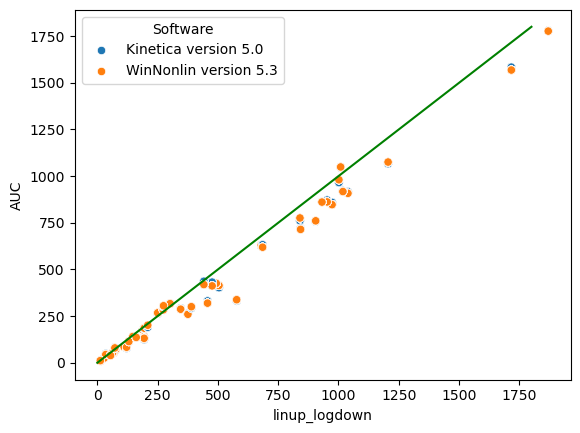

In [38]:
sns.scatterplot(plot_tmp, x = 'linup_logdown', y = 'AUC', hue = 'Software')
plt.plot(np.linspace(0,1800, 10), np.linspace(0,1800, 10), color = 'green')

In [39]:
plot_me = mrt_df.merge(aucmc_df[['ID', 'linup_logdown', 'linear_auc']], how = 'left', on = 'ID')

In [46]:
auc_df.loc[auc_df['ID'] == 'M10']

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID,MRT
248,0.00,0.25,0,0.0,0.000000,0.000000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
249,0.25,0.50,0,2.0,0.455120,0.250000,True,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
250,0.50,1.00,2,69.0,10.635316,17.750000,True,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
251,1.00,1.50,69,56.0,31.638796,31.250000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
252,1.50,2.00,56,27.0,20.398208,20.750000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
253,2.00,4.00,27,13.0,40.395461,40.000000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
254,4.00,8.00,13,8.0,45.265997,42.000000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
255,8.00,12.00,8,4.0,27.220760,24.000000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
256,12.00,24.00,4,4.0,0.000000,48.000000,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342
257,24.00,inf,4,0.0,67.342452,67.342452,False,250.261674,284.432887,291.342452,224.0,243.352109,M10,161.072342


In [43]:
aucmc_df.loc[aucmc_df['ID'] == 'M10']

,time_start,time_end,conc_start,conc_end,section_auc_log_trap,section_auc,section_conc_change_sign,linup_logdown,logup_lindown,linear_auc,lin_auc_alt,log_auc,ID
248,0.00,0.25,0.0,0.0,0.000000,0.000000,False,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
249,0.25,0.50,0.0,1.0,0.360674,0.125000,True,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
250,0.50,1.00,1.0,69.0,9.563058,17.500000,True,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
251,1.00,1.50,69.0,84.0,38.628729,38.250000,True,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
252,1.50,2.00,84.0,54.0,34.457563,34.500000,False,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
253,2.00,4.00,54.0,52.0,107.987653,106.000000,False,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
254,4.00,8.00,52.0,64.0,235.184185,232.000000,True,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
255,8.00,12.00,64.0,48.0,226.494978,224.000000,False,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
256,12.00,24.00,48.0,96.0,843.473218,864.000000,True,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10
257,24.00,inf,96.0,0.0,38789.418742,38789.418742,False,40310.233937,40281.128606,40305.793742,1516.375,40285.5688,M10


In [40]:
plot_me

,ID,Software,AUC,AUMC,CL.F,Cmax,MRT,Tmax,Vss,Vz.F,lambda.z,thalf,linup_logdown,linear_auc
0,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,615962.090187,615943.235829
1,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,615962.090187,615943.235829
2,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,615962.090187,615943.235829
3,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,615962.090187,615943.235829
4,H1,Kinetica version 5.0,916.4590,24149.6147,188.6725,196.647,25.3132,1.0,4775.8961,5305.3049,0.0356,19.4907,615962.090187,615943.235829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,40815.107094,40809.885678
942,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,40815.107094,40809.885678
943,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,40815.107094,40809.885678
944,M9,WinNonlin version 5.3,201.2919,2115.3876,310.2933,30.000,10.9398,1.5,3394.5466,2903.6808,0.1069,6.4864,40815.107094,40809.885678


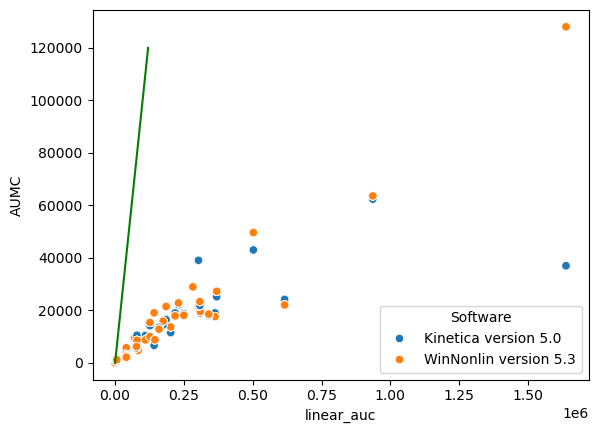

In [41]:
sns.scatterplot(plot_me, x = 'linear_auc', y = 'AUMC', hue = 'Software')
plt.plot(np.linspace(0,120000, 10), np.linspace(0,120000, 10), color = 'green')

# CL/F

In [16]:
auc_df = xth_df.merge(auc_df, how = 'left', on = 'ID')

In [17]:
auc_df

,ID,TIME,CONC,ANALYTE,DOSE,ROUTE,Sex,ConcTime,AUC,AUCMC,MRT
0,L1,0.00,0,xanthohumol,20.0,oral,M,0.0,72.000,523.2500,7.267361
1,L1,0.25,0,xanthohumol,NaN,NaN,M,0.0,72.000,523.2500,7.267361
2,L1,0.50,0,xanthohumol,NaN,NaN,M,0.0,72.000,523.2500,7.267361
3,L1,1.00,34,xanthohumol,NaN,NaN,M,34.0,72.000,523.2500,7.267361
4,L1,1.50,15,xanthohumol,NaN,NaN,M,22.5,72.000,523.2500,7.267361
...,...,...,...,...,...,...,...,...,...,...,...
667,H17,24.00,6,xanthohumol,NaN,NaN,M,144.0,438.625,4512.4375,10.287689
668,H17,48.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689
669,H17,72.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689
670,H17,96.00,0,xanthohumol,NaN,NaN,M,0.0,438.625,4512.4375,10.287689


In [ ]:
auc_df['dose_ug'] = auc_df['DOSE'] * 1000
auc_df['cl/f'] = auc_df['dose_ug']/auc_df['AUC']
clf_df = auc_df[['ID', 'cl/f']].dropna().copy()
clf_df #these are close, but the AUC I was calculating should 

,ID,cl/f
0,L1,277.777778
15,L2,61.279203
30,L3,237.741456
45,L4,1600.000000
60,L5,107.671602
75,L6,104.986877
90,L7,139.494333
105,L8,99.564406
120,L9,148.560817
135,L10,772.946860
